<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Depolarización de LIPSS </font>
</div>


    
<div align="center"> 
<font size=6> Generación de perfiles rugosos </font>
</div>

- **Para**: Paper depolarización de lipss

- **Objetivos**: Demo de uso para generación de archivos txt con perfiles rugosos de LIPSS

- **Descripción** En profiel_comsol_v2-funcion,ipynb he generado un script con el desarrollo de las funciones necesarias para crear funciones (x, f(x)) que representen perfiles. Las funciones son:

    - *Generación de rugosidad*:
      - roughness_Fourier: Rugosidad con un espectro de fourier predeterminado
      - roughness_convolution: Rugosidad con una std y lc predeterminadas
     
    - *Generación de perfiles*:
      - profile_supergaussian_periodical: perfil periódico.
      - profile_supergaussian: Perfil controlado por valores dados en listas, un valor por cada periodo.


    - *Matemáticas*:
      - compute_variogram: Variograma, para calcular sc (valor máximo) y lc longitud de correlación. Tiene la ventaja que es mucho más suaven
      - profile_parameters: Determina los valores de un perfil...hay que sintonizar.
      - rand_parameters: Dado una media y una std, genera los valores para los perfiles.


    - *Utilidades*:
      - draw_profile: Dibuja un perfil
      - save_profile: Guarda un perfil.


Lo mejor de esto será crear una clase que lo aglutine todo, pero lo dejamos para siguiente nivel.

Este archivo está para ver cómo se unsan las funciones
                                   


- **Fecha**: 2023/10/30
        
- **Autores**: 
    - Luis Miguel Sánchez Brea
    - Javier Alda Serrano
    - Mahmoud Elshorgaby

In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
from diffractio import np, plt, sp
from diffractio import degrees, mm, um
from matplotlib import rcParams


from depolarization import (draw_profile, compute_variogram, profile_parameters, roughness_Fourier, 
                                  roughness_convolution, profile_supergaussian, profile_supergaussian_periodical, 
                                  profile_parameters, rand_parameters, save_profile)

In [50]:
rcParams['figure.figsize']=(20,4)

#hay que ejecutarlo 2 veces

# Generación de rugosidad

## Rugosidad con el método de convolución

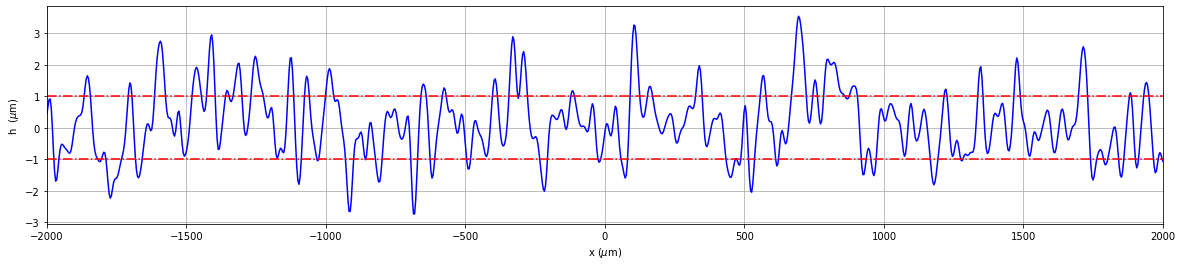

In [51]:

x=np.linspace(-2000*um, 2000*um, 1024)

p = roughness_convolution(x,lc_noise=20, std_noise=1, has_draw=True)


## Rugosidad con el método del espectro

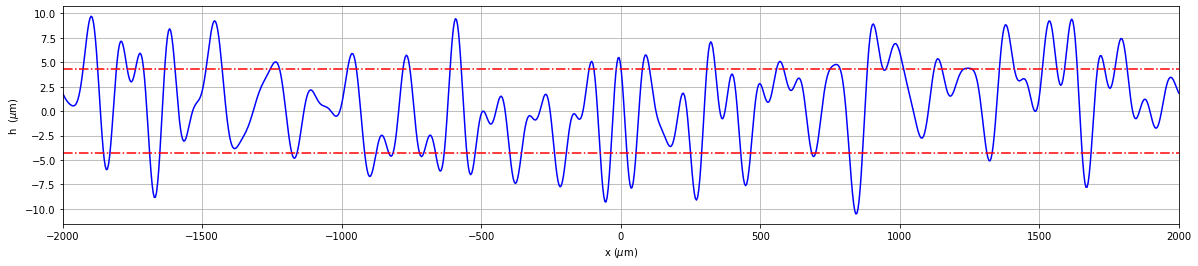

In [52]:
# Defining parameters

num_orders = 50
spectrum = None

# defining the x coordinate of the profile
x=np.linspace(-2000*um, 2000*um, 1024)

profile = roughness_Fourier(x,num_orders,spectrum)


# Generación de perfiles

## Perfil único

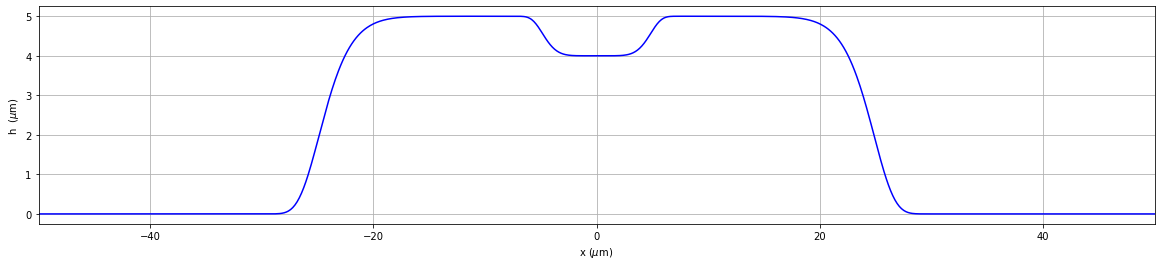

In [53]:
period = 100*um 

params_supergaussian = {}
params_supergaussian['x0']=0*um
params_supergaussian['h1']=5*um
params_supergaussian['sigma1']=25*um
params_supergaussian['beta1']=14.5
params_supergaussian['h2']=1*um
params_supergaussian['sigma2']=5*um
params_supergaussian['beta2']=6

x = np.linspace(-period/2, period/2, 1024)
y = profile_supergaussian_periodical(x, num_periods=1, **params_supergaussian)


<div class="alert alert-block alert-success">
    
<b>Nota:</b>
    
Los parámetros se pueden meter 1 a 1, pero también como un dicccionario. Esto es más fácil porque así no se escribe tanto.
    
</div>



## Perfil con cuatro periodos

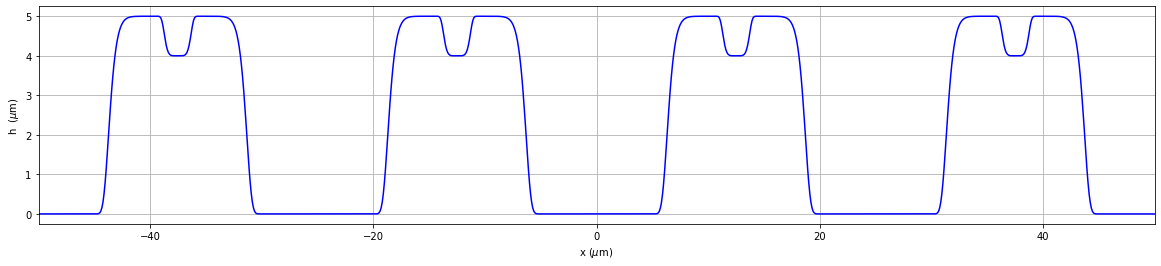

In [54]:
y = profile_supergaussian_periodical(x, num_periods=4, **params_supergaussian)

# Generador de valores aleatorios

Aquí generamos dos distribuciones de datos con una cierta aleatoriedad. He generado dos ejemplos, uno con distribución normal y otro con distribucion uniforme.

In [55]:
normal = rand_parameters(10000, 5,1, 'normal')
uniform = rand_parameters(10000, 5,1, 'uniform')

plt.hist(normal,50, density=True)
plt.figure()
plt.hist(uniform,50, density=True)


# Generador de perfiles

## Sin aleatoriedad

In [56]:
period = 100*um 
num_periods = 12
params_supergaussian = {}
params_supergaussian['x0']=0*um
params_supergaussian['h1']=5*um
params_supergaussian['sigma1']=25*um
params_supergaussian['beta1']=14*um
params_supergaussian['h2']=1*um
params_supergaussian['sigma2']=5*um
params_supergaussiana['beta2']=6*um

x = np.linspace(-period/2*num_periods, period/2*num_periods, 1024)

#sin ruido
profile, profile_noise = profile_supergaussian(x, period= period, num_periods=num_periods, std_noise=0.0*um, lc_noise=5*um,  **params_supergaussian)

#con ruido
profile, profile_noise = profile_supergaussian(x, period= period, num_periods=num_periods, std_noise=0.1*um, lc_noise=5*um,  **params_supergaussian)


NameError: name 'params_supergaussiana' is not defined

## Aleatoriedad en solamente 1 parámetro

In [ ]:
period = 100*um 
num_periods = 12
params_supergaussian = {}
params_supergaussian['x0']=0*um
params_supergaussian['h1']=rand_parameters(num_periods, 5, .5)
params_supergaussian['sigma1']=25*um
params_supergaussian['beta1']=14*um
params_supergaussian['h2']=1*um
params_supergaussian['sigma2']=5*um
params_supergaussian['beta2']=6*um

x = np.linspace(-period/2*num_periods, period/2*num_periods, 1024)
profile, _ = profile_supergaussian(x, period= period, num_periods=num_periods, **params_supergaussian)
profile, profile_noise = profile_supergaussian(x, period= period, num_periods=num_periods, std_noise=0.1*um, lc_noise=5*um,  **params_supergaussian)

## Aleatoriedad en todos los parámetros

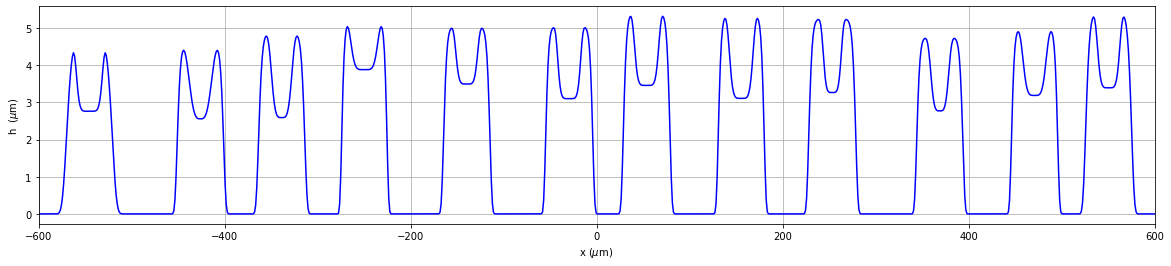

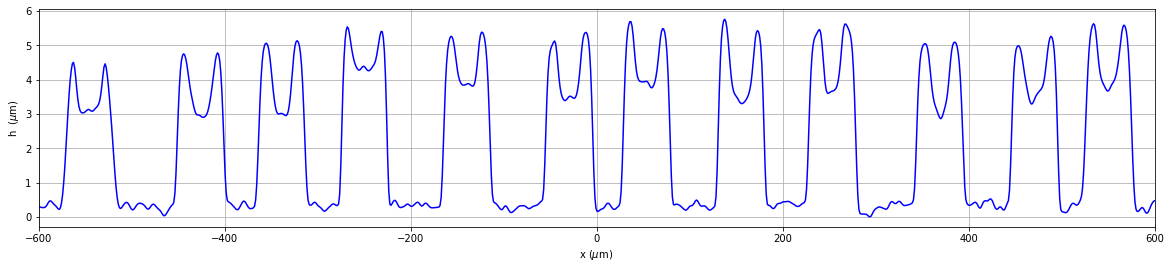

In [ ]:
period = 100*um 
num_periods = 12
params_supergaussian = {}
params_supergaussian['period'] = period
params_supergaussian['num_periods'] = num_periods
params_supergaussian['x0']=rand_parameters(num_periods, 0, period/8)
params_supergaussian['h1']=rand_parameters(num_periods, 5, .25)
params_supergaussian['sigma1']=rand_parameters(num_periods, 25, .25)
params_supergaussian['beta1']=rand_parameters(num_periods, 12, 2)
params_supergaussian['h2']=rand_parameters(num_periods, 2, .25)
params_supergaussian['sigma2']=rand_parameters(num_periods, 12, 2)
params_supergaussian['beta2']=rand_parameters(num_periods, 5, 1)

x = np.linspace(-period/2*num_periods, period/2*num_periods, 1024)
profile_standard, _ = profile_supergaussian(x, std_noise=0.0*um, lc_noise=5*um,  **params_supergaussian)
profile_standard, profile_noise = profile_supergaussian(x, std_noise=0.1*um, lc_noise=5*um,  **params_supergaussian)

# Guardar datos

Guarda los valores x,y  y además un archivo .mat con los datos del perfil (valores de parámetros, etc.)

In [ ]:
save_profile("prueba", x, profile_standard, '_m_1', params_supergaussian)



Crea los archivos prueba_

- prueba_m_1.txt
- prueba_m_1.mat
- prueba_m_1.npz

Si no se pone nada en params_supergaussian no crea el archivo .mat

